In [1]:
import sys; sys.path.insert(0,'../')
from notebook_tools import *
%matplotlib inline

# load data

In [42]:
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs_0_1000_simulationruns_results.csv')
print len(sims),'runs in the sample'

437 runs in the sample


## sigma_t

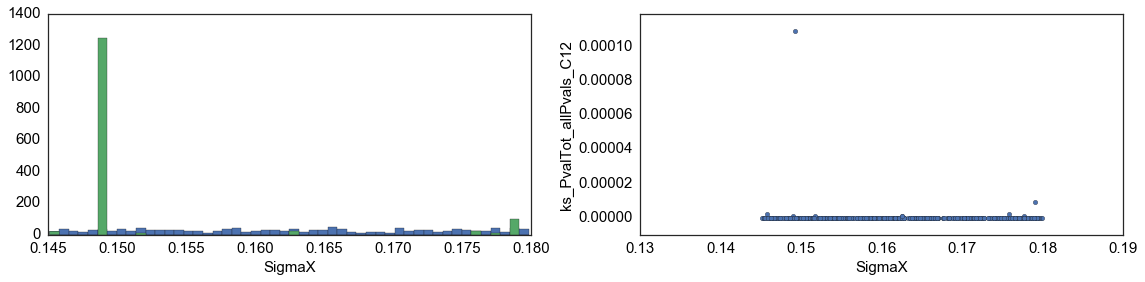

In [43]:
var,w = 'SigmaX','ks_PvalTot_allPvals_C12'
weights = sims[w]
x = sims['gen_'+var]
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(1,2,1)
h,bins,_=plt.hist(x,bins=50,normed=1);
plt.hist(x,weights=weights,bins=bins,normed=1);
set_axes(ax,x_label=var,fontsize=15)
ax = fig.add_subplot(1,2,2)
plt.scatter(x,weights);
set_axes(ax,x_label=var,y_label=w,fontsize=15)
ax.set_ylim(np.min(weights)-0.00001,np.max(weights)+0.00001)
plt.tight_layout()